In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose

## ES Crossboarder Flows

General information:

* observations: 142816
* features: 4 [power_mw, from_country, to_country, type]
    * power_mw: power in MW
    * from_country: country providing energy
    * to_country: country receiving energy
    * type: crossboarder_flow
* start date: 2016-12-31 23:00:00
* end date: 2019-09-20 02:00:00
* time steps: 1 hour

In [66]:
# inmport data
es = pd.read_csv("data/es_crossboarder_flows.csv", squeeze=True, parse_dates=True)

In [67]:
es.shape

(142816, 5)

In [68]:
es.head()

,dt_start_utc,power_mw,from_country,to_country,type
0,2016-12-31 23:00:00,636,DE,DK,crossboarder_flow
1,2016-12-31 23:00:00,2331,DE,NL,crossboarder_flow
2,2016-12-31 23:00:00,1,DE,SE,crossboarder_flow
3,2016-12-31 23:00:00,585,DK,DE,crossboarder_flow
4,2016-12-31 23:00:00,0,NL,DE,crossboarder_flow


In [69]:
es['type'].unique()

array(['crossboarder_flow'], dtype=object)

In [70]:
es['dt_start_utc'].min()

'2016-12-31 23:00:00'

In [71]:
es['dt_start_utc'].max()

'2019-09-20 02:00:00'

In [72]:
es.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142816 entries, 0 to 142815
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   dt_start_utc  142816 non-null  object
 1   power_mw      142816 non-null  int64 
 2   from_country  142816 non-null  object
 3   to_country    142816 non-null  object
 4   type          142816 non-null  object
dtypes: int64(1), object(4)
memory usage: 5.4+ MB


In [73]:
es.describe()

,power_mw
count,142816.000000
mean,533.197562
std,814.887784
min,0.000000
25%,0.000000
50%,50.000000
75%,744.000000
max,5134.000000


In [74]:
es['dt_start_utc'] = pd.to_datetime(es['dt_start_utc'])

In [75]:
# count zeros in the power_mw column
es[es['power_mw'] == 0].count()

dt_start_utc    58203
power_mw        58203
from_country    58203
to_country      58203
type            58203
dtype: int64

In [76]:
es = es.set_index('dt_start_utc')

<AxesSubplot:xlabel='dt_start_utc'>

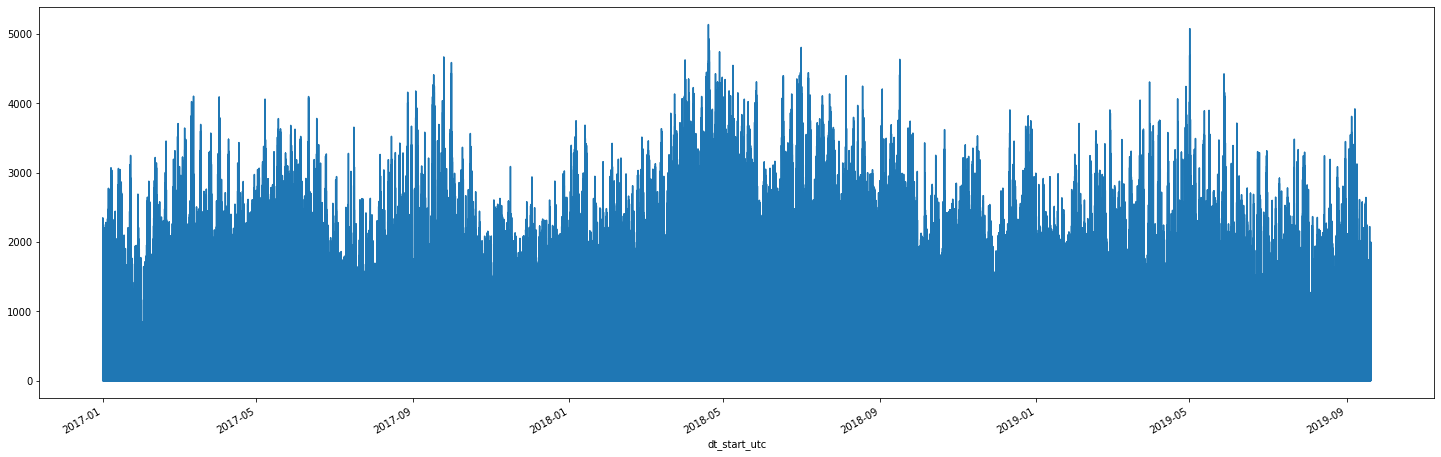

In [77]:
plt.figure(figsize=(25, 8))
es['power_mw'].plot()

In [78]:
# Define plotting parameters and custom color palette 
cmaps_hex = ['#193251','#FF5A36','#1E4485', '#99D04A','#FF5A36', '#DB6668']
#sns.set_palette(palette=cmaps_hex)
sns_c = sns.color_palette(palette=cmaps_hex)

plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100

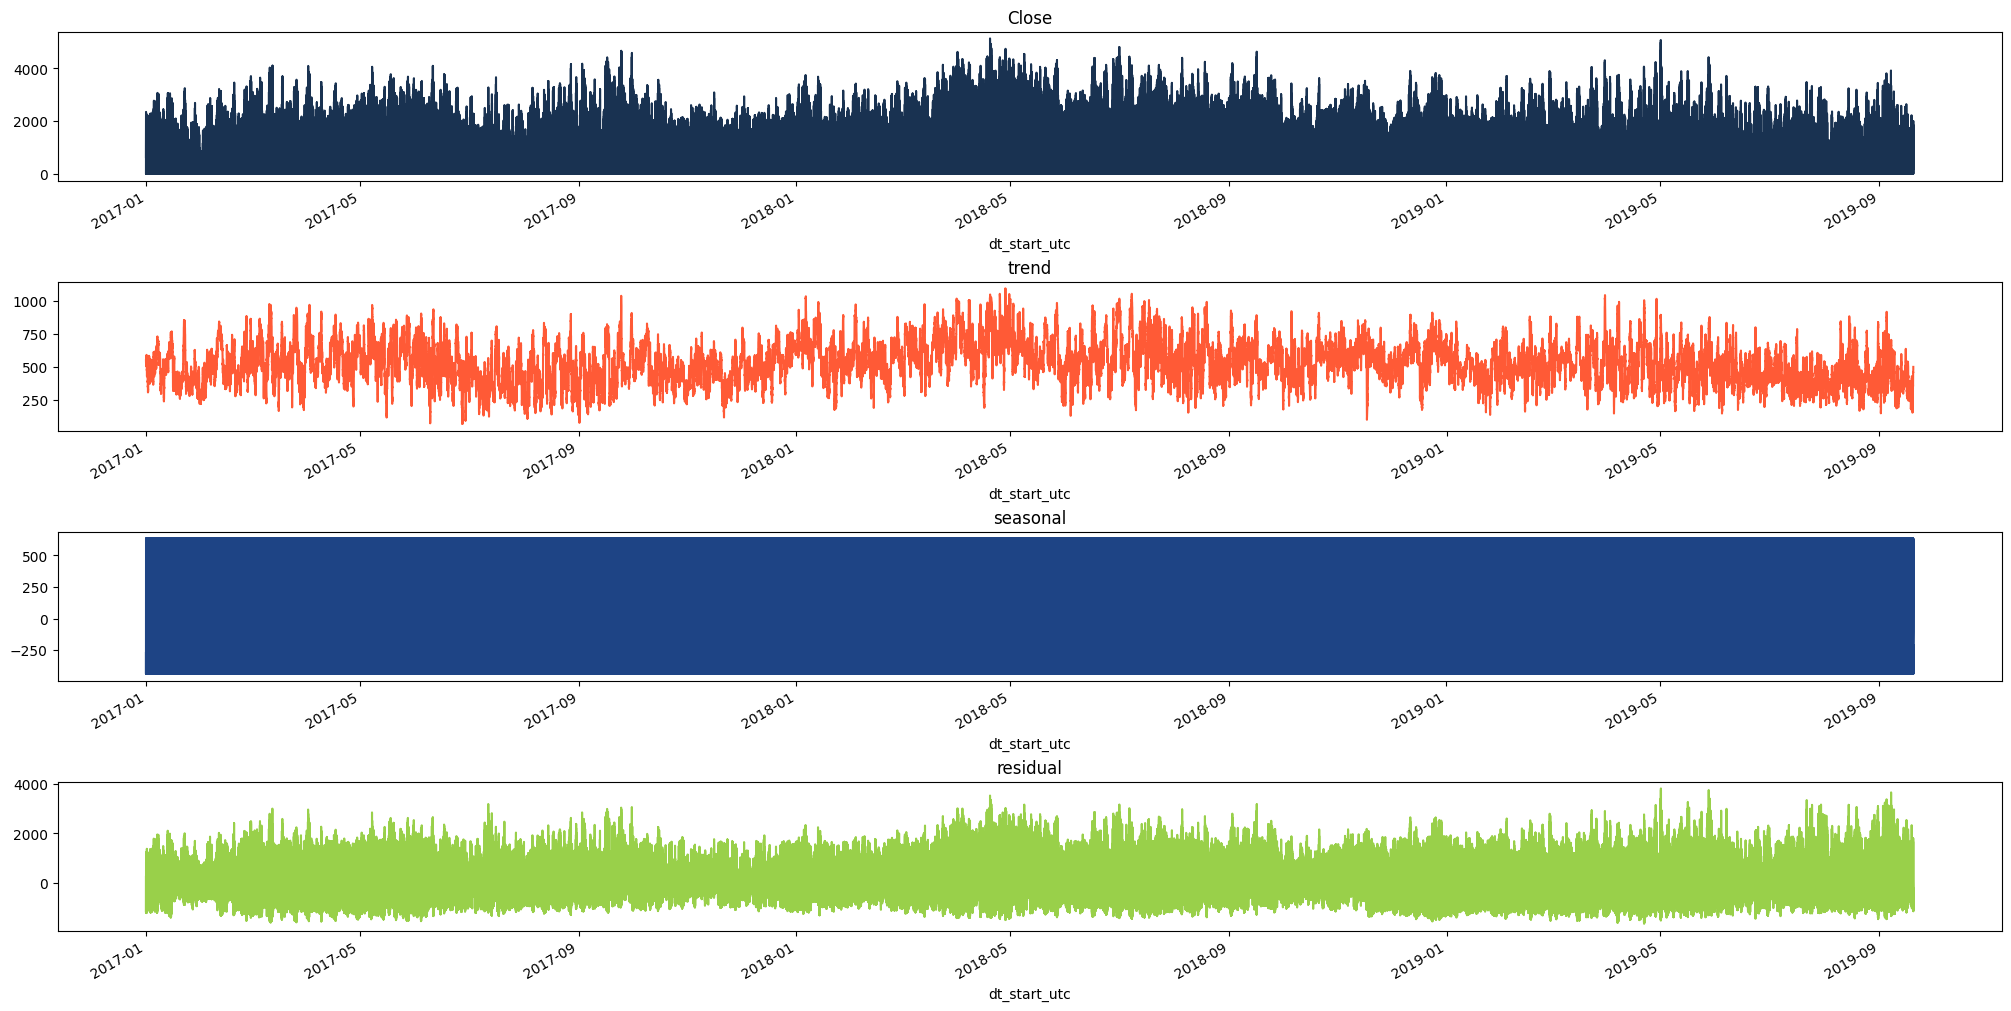

In [79]:
# Check decomposition of trend, seasonality and residue of original time series
decomposition = seasonal_decompose(x=es['power_mw'], 
                                   model='additive',
                                   period=30)


fig, ax = plt.subplots(4, 1, figsize=(12, 12), constrained_layout=True)
decomposition.observed.plot(c=sns_c[0], ax=ax[0])
ax[0].set(title='Close')
decomposition.trend.plot(c=sns_c[1], ax=ax[1])
ax[1].set(title='trend')
decomposition.seasonal.plot(c=sns_c[2], ax=ax[2])
ax[2].set(title='seasonal')
decomposition.resid.plot(c=sns_c[3], ax=ax[3])
ax[3].set(title='residual')
fig.set_size_inches(20, 10);

## ES Forecast

* observations: 36876431
* features: 5 [power_mw, carrier, type, area, version_utc]
    * power_mw: power in MW
    * carrier: ['Gesamt', 'Solar', 'Wind Offshore', 'Wind Onshore']
    * type: ['Load Forecast', 'Renewables Forecast']
    * area: ['50Hertz', 'DE', 'DK', 'DK1', 'TTG']
    * version_utc: ?
* start date: 2016-12-31 23:00:00
* end date: 2021-07-14 21:45:00
* time steps: 15 min

In [80]:
es_fc = pd.read_csv("data/es_forecast.csv", squeeze=True, parse_dates=True)

In [81]:
es_fc.shape

(36876431, 6)

In [82]:
es_fc.head(10)

,dt_start_utc,power_mw,carrier,type,area,version_utc
0,2016-12-31 23:00:00,6291,Gesamt,Load Forecast,50Hertz,2019-09-20 14:00:00
1,2016-12-31 23:00:00,40241,Gesamt,Load Forecast,DE,2019-09-20 14:00:00
2,2016-12-31 23:00:00,2942,Gesamt,Load Forecast,DK,2019-09-20 14:00:00
3,2016-12-31 23:00:00,1572,Gesamt,Load Forecast,DK1,2019-09-20 14:00:00
4,2016-12-31 23:00:00,11971,Gesamt,Load Forecast,TTG,2019-09-20 14:00:00
5,2016-12-31 23:00:00,0,Gesamt,Renewables Forecast,50Hertz,2019-09-20 14:00:00
6,2016-12-31 23:00:00,0,Gesamt,Renewables Forecast,DE,2019-09-20 14:00:00
7,2016-12-31 23:00:00,0,Gesamt,Renewables Forecast,DK,2019-09-20 14:00:00
8,2016-12-31 23:00:00,0,Gesamt,Renewables Forecast,DK1,2019-09-20 14:00:00
9,2016-12-31 23:00:00,0,Gesamt,Renewables Forecast,TTG,2019-09-20 14:00:00


In [83]:
es_fc.groupby('dt_start_utc').mean()

,power_mw
dt_start_utc,
2016-12-31 23:00:00,4000.640000
2016-12-31 23:15:00,6392.733333
2016-12-31 23:30:00,7490.000000
2016-12-31 23:45:00,7439.000000
2017-01-01 00:00:00,3827.280000
...,...
2021-07-14 20:45:00,25292.666667
2021-07-14 21:00:00,16073.000000
2021-07-14 21:15:00,24644.000000


In [84]:
es_fc['dt_start_utc'].min()

'2016-12-31 23:00:00'

In [85]:
es_fc['dt_start_utc'].max()

'2021-07-14 21:45:00'

In [86]:
es_fc['area'].unique()

array(['50Hertz', 'DE', 'DK', 'DK1', 'TTG'], dtype=object)

In [87]:
es_fc['type'].unique()

array(['Load Forecast', 'Renewables Forecast'], dtype=object)

In [88]:
es_fc['carrier'].unique()

array(['Gesamt', 'Solar', 'Wind Offshore', 'Wind Onshore'], dtype=object)

In [89]:
es_fc['version_utc'].nunique()

16403

In [90]:
es_fc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36876431 entries, 0 to 36876430
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   dt_start_utc  object
 1   power_mw      int64 
 2   carrier       object
 3   type          object
 4   area          object
 5   version_utc   object
dtypes: int64(1), object(5)
memory usage: 1.6+ GB


In [91]:
es_fc.describe()

,power_mw
count,3.687643e+07
mean,8.283931e+03
std,1.411223e+04
min,0.000000e+00
25%,4.820000e+02
50%,2.865000e+03
75%,9.648000e+03
max,7.639300e+04


In [92]:
# convert timestamps to datetime object
es_fc['dt_start_utc'] = pd.to_datetime(es_fc['dt_start_utc'])
es_fc['version_utc'] = pd.to_datetime(es_fc['version_utc'])

In [93]:
es_fc = es_fc.set_index('dt_start_utc')

In [94]:
#es_fc['power_mw'].plot()

KeyboardInterrupt: 

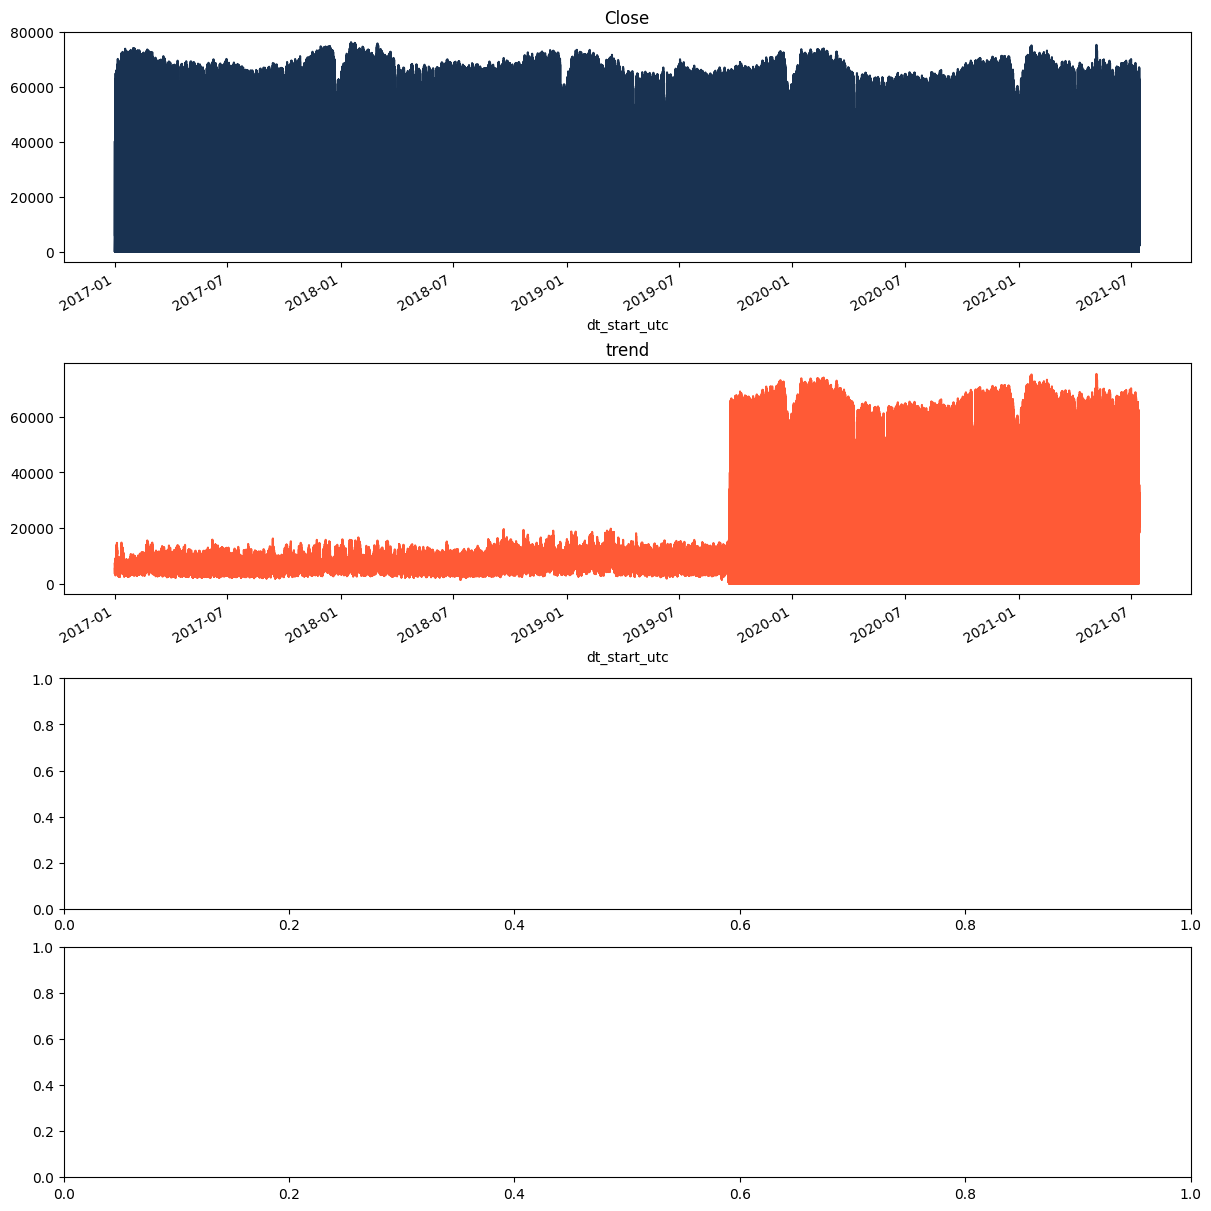

In [95]:
# Check decomposition of trend, seasonality and residue of original time series
decomposition_fc = seasonal_decompose(x=es_fc['power_mw'], 
                                   model='additive',
                                   period=30)


fig, ax = plt.subplots(4, 1, figsize=(12, 12), constrained_layout=True)
decomposition_fc.observed.plot(c=sns_c[0], ax=ax[0])
ax[0].set(title='Close')
decomposition_fc.trend.plot(c=sns_c[1], ax=ax[1])
ax[1].set(title='trend')
decomposition_fc.seasonal.plot(c=sns_c[2], ax=ax[2])
ax[2].set(title='seasonal')
decomposition_fc.resid.plot(c=sns_c[3], ax=ax[3])
ax[3].set(title='residual')
fig.set_size_inches(20, 10);

## Imbalance DE

* observations: 257010
* features: 2 (unknown meaning, probably power in MW)
    * 1st column:
    * 2nd column: 
* start date: 2013-12-31 23:00:00
* end date: 2021-05-22 22:00:0
* time steps: 15 min

In [96]:
imb = pd.read_csv("data/imbalance_de.csv", header=None)

In [97]:
imb.shape

(257010, 3)

In [98]:
imb.head(10)

,0,1,2
0,2013-12-31 23:00:00,707.500,156.36
1,2013-12-31 23:15:00,966.296,81.23
2,2013-12-31 23:30:00,1018.984,104.01
3,2013-12-31 23:45:00,867.940,60.51
4,2014-01-01 00:00:00,1738.004,239.03
5,2014-01-01 00:15:00,1436.952,89.82
6,2014-01-01 00:30:00,1091.580,75.11
7,2014-01-01 00:45:00,724.676,59.29
8,2014-01-01 01:00:00,926.316,64.42
9,2014-01-01 01:15:00,848.392,62.21


In [99]:
imb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257010 entries, 0 to 257009
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       257010 non-null  object 
 1   1       256807 non-null  float64
 2   2       257010 non-null  float64
dtypes: float64(2), object(1)
memory usage: 5.9+ MB


In [100]:
imb.describe()

,1,2
count,256807.000000,257010.000000
mean,80.856740,34.069293
std,494.219467,127.651278
min,-4111.964000,-6503.730000
25%,-205.410000,5.280000
50%,76.797000,38.080000
75%,365.612500,60.940000
max,3866.284000,24455.050000


In [101]:
imb[0] = pd.to_datetime(imb[0])

In [102]:
imb = imb.set_index(0)

In [103]:
imb.head()

,1,2
0,,
2013-12-31 23:00:00,707.500,156.36
2013-12-31 23:15:00,966.296,81.23
2013-12-31 23:30:00,1018.984,104.01
2013-12-31 23:45:00,867.940,60.51
2014-01-01 00:00:00,1738.004,239.03


In [104]:
#imb[0].min()

In [105]:
#imb[0].max()

<AxesSubplot:xlabel='0'>

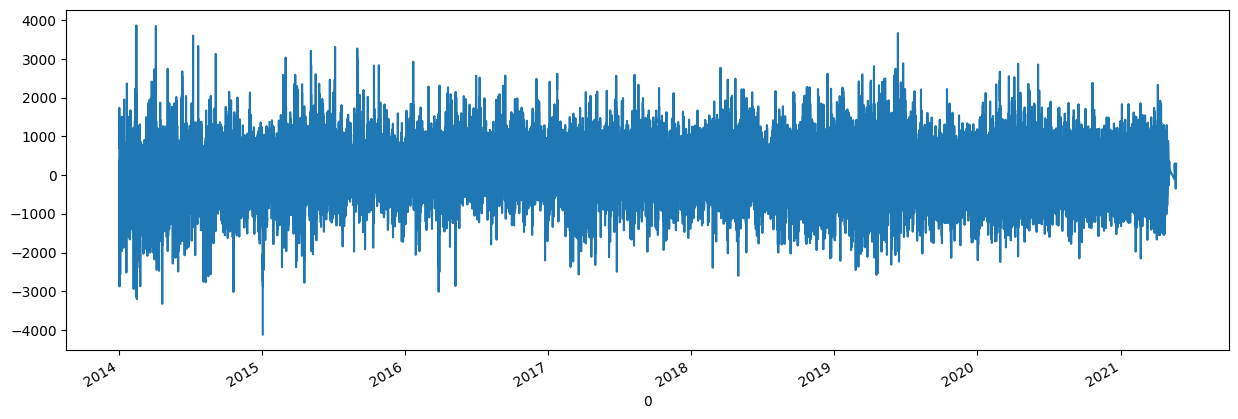

In [106]:
imb[1].plot()

<AxesSubplot:xlabel='0'>

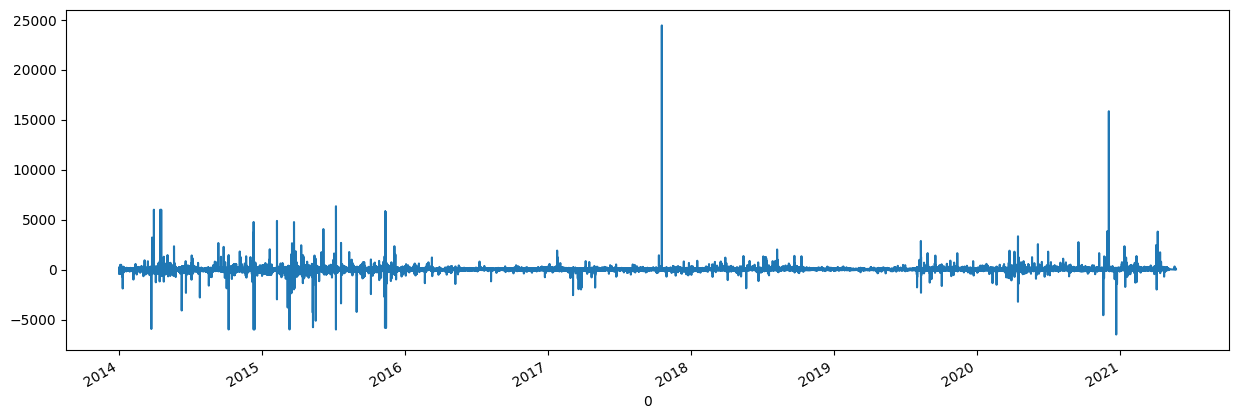

In [107]:
imb[2].plot()

In [108]:
imb_1 = imb[1]

In [109]:
imb_1.dropna(inplace=True)

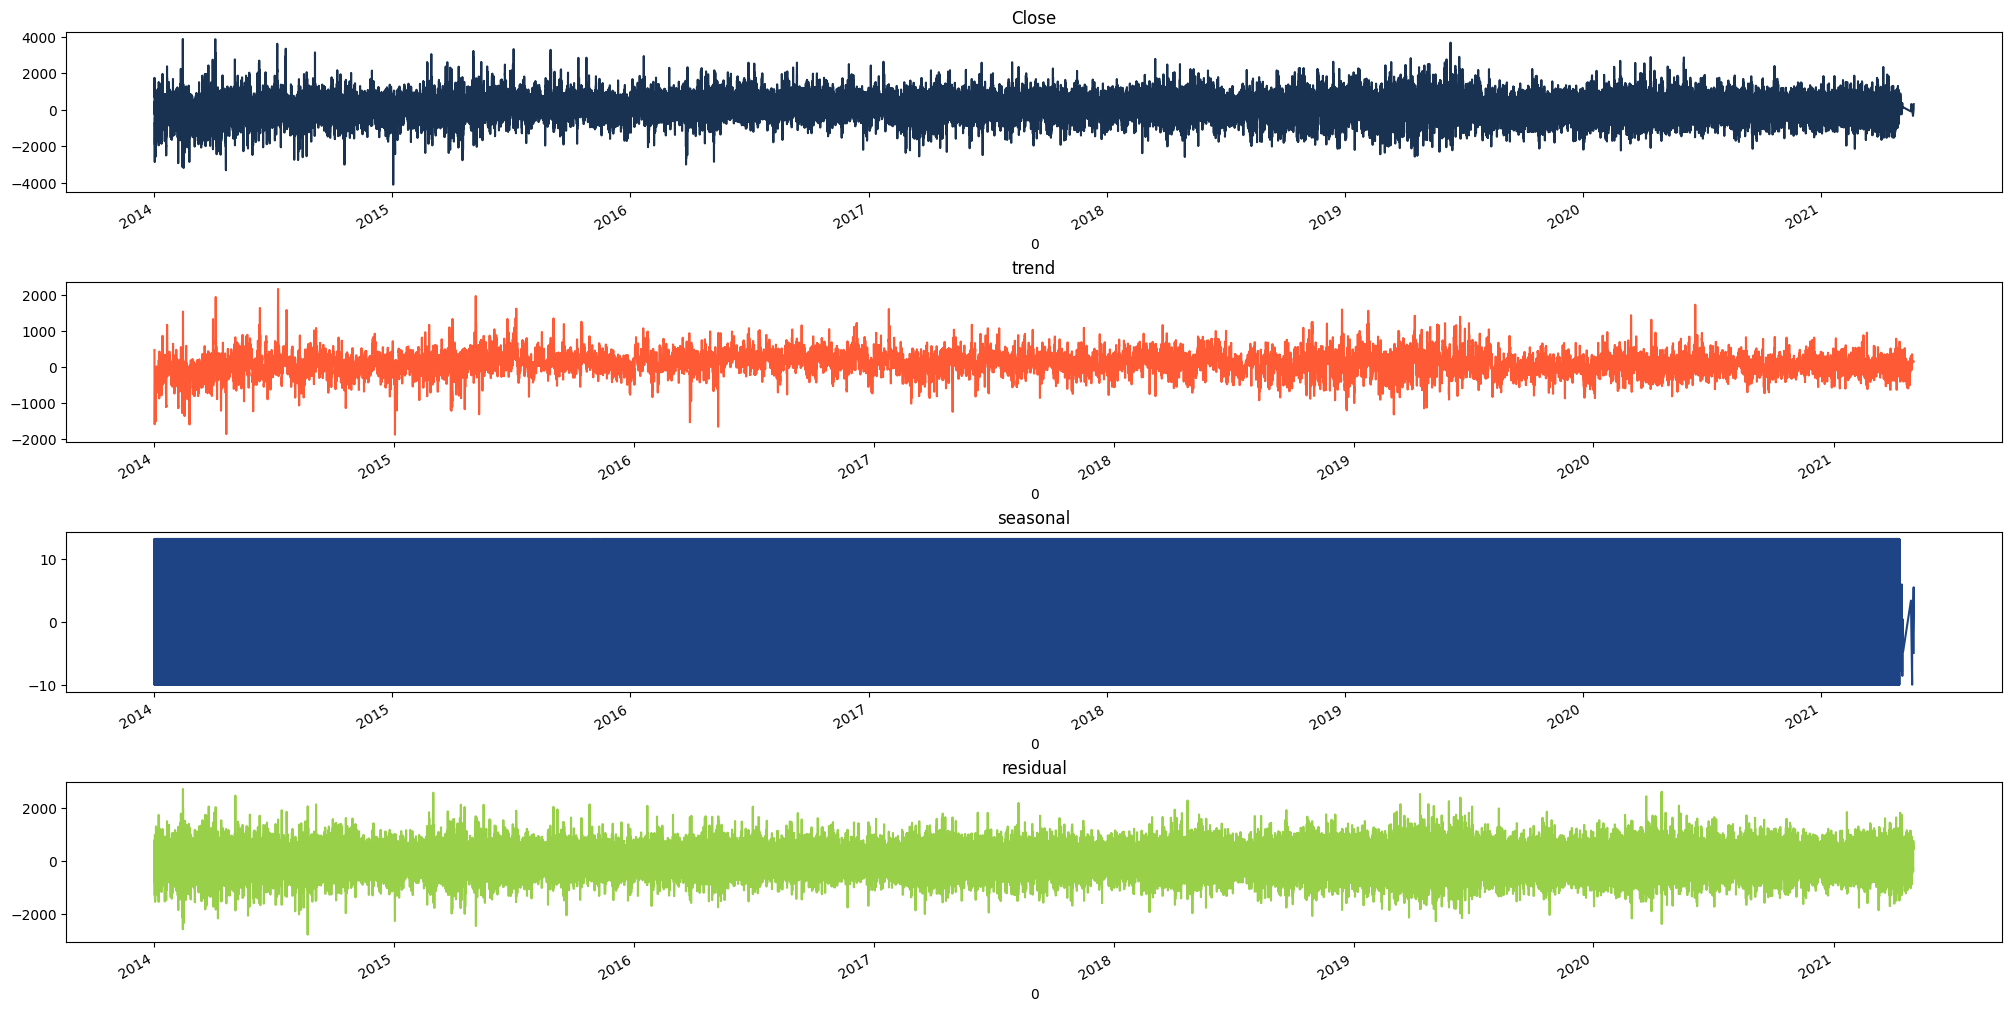

In [110]:
# Check decomposition of trend, seasonality and residue of original time series
decomposition_1 = seasonal_decompose(x=imb_1, 
                                   model='additive',
                                   period=30)


fig, ax = plt.subplots(4, 1, figsize=(12, 12), constrained_layout=True)
decomposition_1.observed.plot(c=sns_c[0], ax=ax[0])
ax[0].set(title='Close')
decomposition_1.trend.plot(c=sns_c[1], ax=ax[1])
ax[1].set(title='trend')
decomposition_1.seasonal.plot(c=sns_c[2], ax=ax[2])
ax[2].set(title='seasonal')
decomposition_1.resid.plot(c=sns_c[3], ax=ax[3])
ax[3].set(title='residual')
fig.set_size_inches(20, 10);

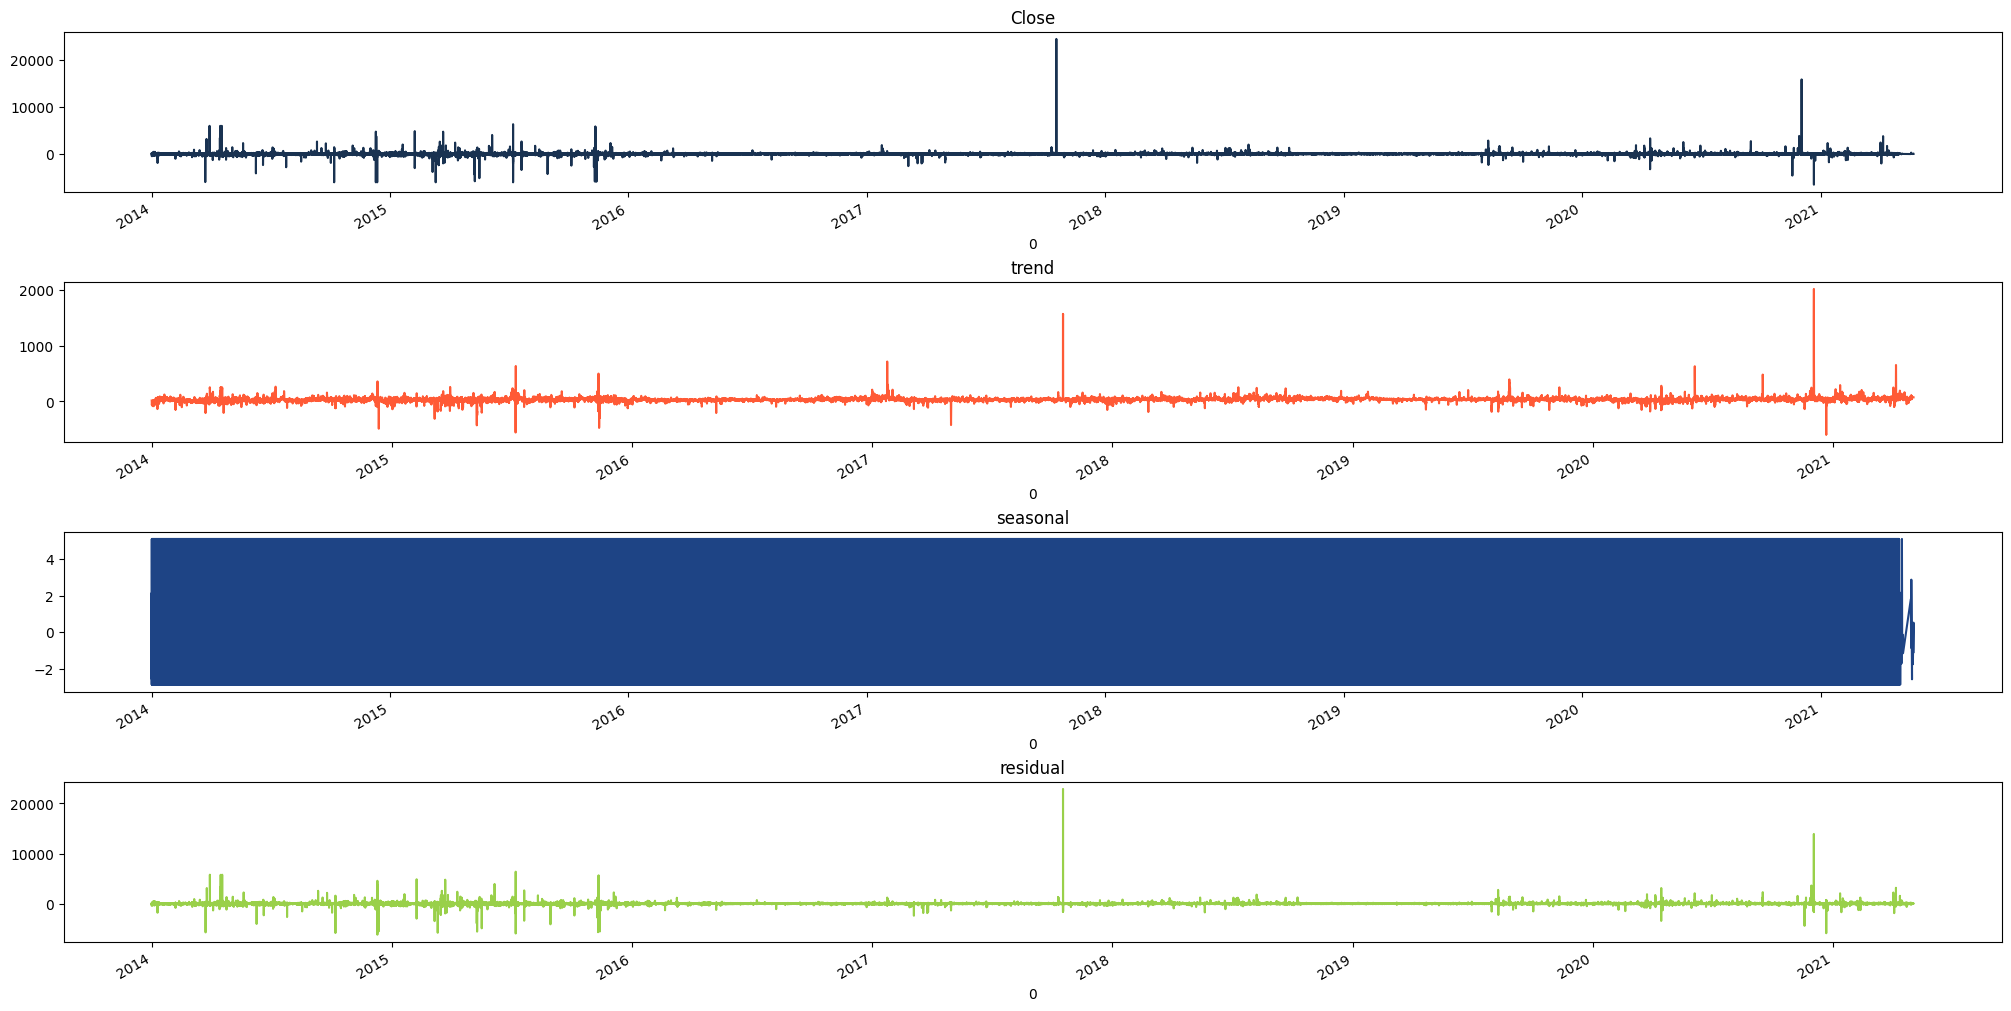

In [111]:
# Check decomposition of trend, seasonality and residue of original time series
decomposition_2 = seasonal_decompose(x=imb[2], 
                                   model='additive',
                                   period=30)


fig, ax = plt.subplots(4, 1, figsize=(12, 12), constrained_layout=True)
decomposition_2.observed.plot(c=sns_c[0], ax=ax[0])
ax[0].set(title='Close')
decomposition_2.trend.plot(c=sns_c[1], ax=ax[1])
ax[1].set(title='trend')
decomposition_2.seasonal.plot(c=sns_c[2], ax=ax[2])
ax[2].set(title='seasonal')
decomposition_2.resid.plot(c=sns_c[3], ax=ax[3])
ax[3].set(title='residual')
fig.set_size_inches(20, 10);

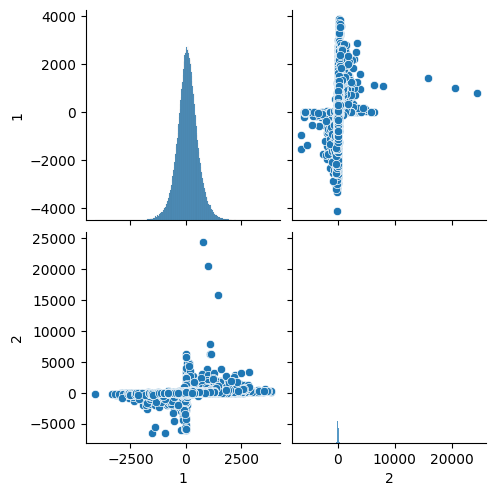

In [112]:
sns.pairplot(imb)

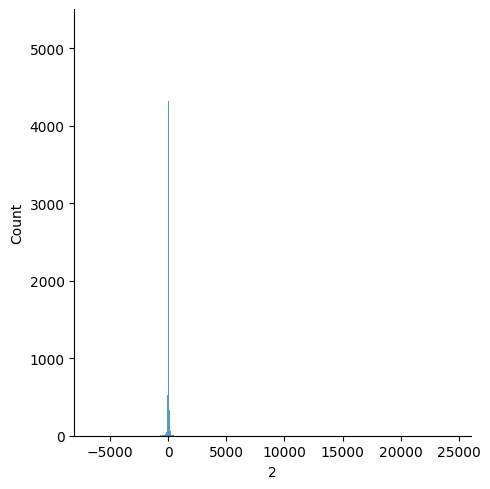

In [113]:
sns.displot(imb[2])

## epex da de json

* observations: 144911
* features: 3 [sechs_h_regelung, epex_da_de_eur_mwh, epex_da_de_mwh]
    * sechs_h_regelung: boolean, 6-hour rule a provision to reduce subsidies when electricity prices are negative
    * epex_da_de_eur_mwh: price in EUR per MWh
    * epex_da_de_mwh: NULL for all entries
* start date: 2004-12-31 23:00:00
* end date: 2021-07-13 21:00:00
* time steps: 1 hour

In [114]:
epex = pd.read_json("data/epex_da_de.json")

In [115]:
epex.head()

,dt_start_utc,sechs_h_regelung,epex_da_de_eur_mwh,epex_da_de_mwh
0,2004-12-31 23:00:00,0,23.89,NaN
1,2005-01-01 00:00:00,0,20.05,NaN
2,2005-01-01 01:00:00,0,15.00,NaN
3,2005-01-01 02:00:00,0,13.41,NaN
4,2005-01-01 03:00:00,0,13.73,NaN


In [116]:
epex['dt_start_utc'] = pd.to_datetime(epex['dt_start_utc'])

In [117]:
epex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144911 entries, 0 to 144910
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   dt_start_utc        144911 non-null  datetime64[ns]
 1   sechs_h_regelung    144911 non-null  int64         
 2   epex_da_de_eur_mwh  144911 non-null  float64       
 3   epex_da_de_mwh      0 non-null       float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 4.4 MB


In [118]:
epex.describe()

,sechs_h_regelung,epex_da_de_eur_mwh,epex_da_de_mwh
count,144911.000000,144911.000000,0.0
mean,0.005093,41.495806,NaN
std,0.071182,24.305395,NaN
min,0.000000,-500.020000,NaN
25%,0.000000,29.000000,NaN
50%,0.000000,38.900000,NaN
75%,0.000000,51.160000,NaN
max,1.000000,2436.630000,NaN


In [119]:
epex['dt_start_utc'].min()

Timestamp('2004-12-31 23:00:00')

In [120]:
epex['dt_start_utc'].max()

Timestamp('2021-07-13 21:00:00')

In [121]:
epex['sechs_h_regelung'].unique()

array([0, 1])